
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [13]:

import numpy as np
import matplotlib.pyplot as plt


In [14]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std # this way, the scaled data will have a mean of 0 and std deviation of 1

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [15]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr = 0.01, epochs = 1000, l2_lambda = 0.0): # the constructor for the model class
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias # standard prediction y for given weights and bias
            mse_loss = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
            l2_regularization = (self.l2_lambda / 2 * n_samples) * np.sum(self.weights ** 2)
            mse_loss += l2_regularization
            self.loss_history.append(mse_loss)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.l2_lambda / n_samples) * self.weights # regularised update to weights
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


Regularization is avery effective technique that counteracts Overfitting by adding an additional penalty term to the loss function. They can be fundamentally implemented as one of either Lasso or Ridge normalization:

# **1. L1 Regularization (Lasso)**
L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficients ($\sum |W|$). Here I present a couple of salient features.

* Feature Selection: L1 has a unique property where it can push the weights of less important features to exactly zero.

* Use Case: It is ideal when you suspect that only a few features in your dataset are actually relevant.

# **2.L2 Regularization (Ridge)**
L2 regularization adds a penalty equal to the square of the magnitude of the coefficients ($\sum W^2$).

* Weight Decay: Instead of eliminating features, L2 penalizes large weights by making them very small, but rarely zero.

* Implementation: In practice, this term is often scaled by a factor like $\frac{\lambda}{2n}$ to keep the regularization strength consistent across different dataset sizes.

* Use Case: It is generally used to improve model stability and prevent any single feature from dominating the output.

In [16]:
class LinearRegressionL1:
   def __init__(self, lr=0.01, epochs=1000, l1_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l1_lambda = l1_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

   def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            mse_loss = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
            l2_regularization = (self.l1_lambda / 2 * n_samples) * np.sum(np.abs(self.weights))
            mse_loss += l2_regularization
            self.loss_history.append(mse_loss)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.l1_lambda / n_samples) * np.sign(self.weights)
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

   def predict(self, X):
        return np.dot(X, self.weights) + self.bias


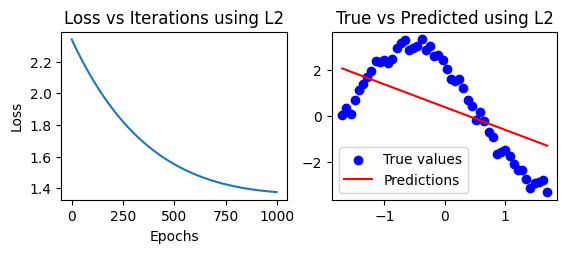

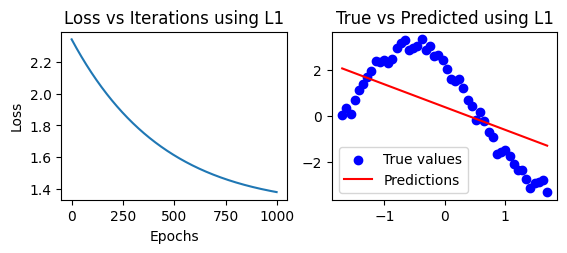

In [17]:
num_samples = 50 # dataset constructed in guiding notebook
X = np.linspace(0,np.pi/2,num_samples)
y = 3*np.sin(3*X) + np.random.normal(loc = 0,scale=0.2,size = num_samples)

y = y.flatten()

scalar = StandardScalerManual()
x_scaled = scalar.fit_transform(X.reshape(-1,1))

model = LinearRegressionManual(lr=0.001, epochs=1000, l2_lambda=0.01) # building models
model2 = LinearRegressionL1(lr=0.001, epochs=1000, l1_lambda=0.01)
model.fit(x_scaled, y) # model corresponding to L2 regularisation
model2.fit(x_scaled,y) # model corresponding to L1 regularisation

plt.subplot(2, 2, 1)
plt.plot(model.loss_history)
plt.title("Loss vs Iterations using L2")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(2, 2, 2)
plt.scatter(x_scaled, y, color='blue', label='True values')
plt.plot(x_scaled, model.predict(x_scaled), color='red', label='Predictions')
plt.title("True vs Predicted using L2")
plt.legend()
plt.show()

plt.subplot(2, 2, 3)
plt.plot(model2.loss_history)
plt.title("Loss vs Iterations using L1")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(2, 2, 4)
plt.scatter(x_scaled, y, color='blue', label='True values')
plt.plot(x_scaled, model2.predict(x_scaled), color='red', label='Predictions')
plt.title("True vs Predicted using L1")
plt.legend()
plt.show()

As we can see here, no possible value of the weights set and bias will ever constraint our model to hug the true value curve. This is called underfitting. With such a dataset at hand, we will need to use polynomial features instead of linear ones.


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [18]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [19]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(z)

            epsilon = 1e-15 # contingency to avoid log(0) case
            loss = - (1/n_samples) * np.sum(y * np.log(y_predicted + epsilon) + (1-y) * np.log(1 - y_predicted + epsilon)) # binary cross entropy
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(np.square(self.weights))
            self.loss_history.append(loss + l2_penalty)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return sigmoid(z) # raw probability output

    def predict(self, X):
        y_hat_probs = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_hat_probs] # classification

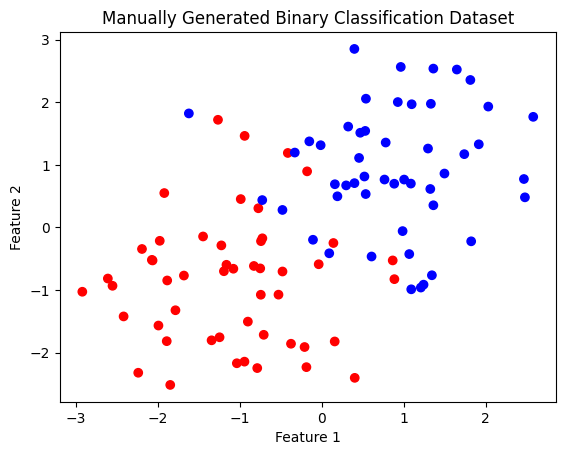

In [20]:
def generate_binary_data(n_samples=100):
    np.random.seed(42)

    half = n_samples // 2

    X0 = np.random.randn(half, 2) + np.array([1,1])
    y0 = np.zeros(half)

    X1 = np.random.randn(half, 2) + np.array([-1, -1])
    y1 = np.ones(half)

    X = np.vstack((X0, X1))
    y = np.hstack((y0, y1))

    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    return X[indices], y[indices]

X_class, y_class = generate_binary_data(100)
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap = "bwr")
plt.title("Manually Generated Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Final Loss w/ Standardization: 0.18599122239763394
Accuracy w/ Standardization: 89.0%


Text(0, 0.5, 'Loss')

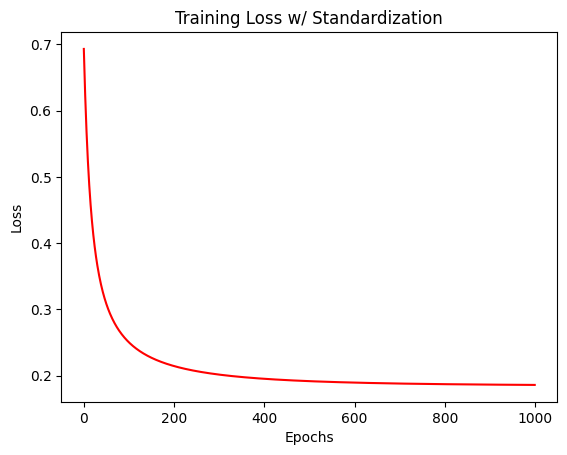

In [21]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_class)

model3 = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model3.fit(X_scaled, y_class)
model4 = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.0)
model4.fit(X_class, y_class)

print(f"Final Loss w/ Standardization: {model3.loss_history[-1]}")
predictions = np.array(model3.predict(X_scaled))
accuracy = np.mean(predictions == y_class)
print(f"Accuracy w/ Standardization: {accuracy * 100}%")

plt.plot(model3.loss_history, color='red')
plt.title("Training Loss w/ Standardization")
plt.xlabel("Epochs")
plt.ylabel("Loss")


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [22]:
from sklearn.cluster import KMeans
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    X = M.flatten().reshape(-1,1)
    n, m = M.shape

    kmeans = KMeans(n_clusters=k, max_iter=max_iters)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_.flatten()

    assignment_table = labels.reshape(n, m)
    cookbook = {cluster_id: [] for cluster_id in range(k)}

    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids


M = np.random.rand(5, 5) * 100
k = 3
assign_table, cookbook, centroids = kmeans_matrix(M, k)

print("Example Centroids:", centroids)
print("\nExample Assignment Table (Cluster Labels):\n", assign_table)
print("\nExample Cookbook entry (Cluster 0):", cookbook[0][:10], "...") # first 10  entries

Example Centroids: [44.99095331 69.95458963  8.81547611]

Example Assignment Table (Cluster Labels):
 [[2 1 1 0 2]
 [0 0 2 0 0]
 [1 1 2 0 1]
 [0 1 1 2 2]
 [1 2 1 1 1]]

Example Cookbook entry (Cluster 0): [(0, 3), (1, 0), (1, 1), (1, 3), (1, 4), (2, 3), (3, 0)] ...



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
